## **import libraries**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from sklearn import preprocessing
import random
import pandas as pd
from matplotlib.colors import Sequence
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Conv1D, Flatten
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

### **read main dataset**

In [6]:
data = pd.read_csv('/content/drive/MyDrive/dataset/original_result.csv')
data.head()
main_dataframe = data.transpose()
main_dataframe.head()
column_name = main_dataframe.iloc[0]
main_dataframe = main_dataframe[1:]
main_dataframe.columns = column_name
main_dataframe

operationName,post_storage_read_posts_server,read_home_timeline_server,read_home_timeline_redis_find_client,read_home_timeline_client,/wrk2-api/home-timeline/read,compose_creator_server,compose_media_server,url_mongo_insert_client,compose_urls_server,compose_user_mentions_memcached_get_client,...,write_user_timeline_server,read_user_timeline_redis_find_client,user_timeline_mongo_find_client,user_timeline_redis_update_client,read_user_timeline_server,/wrk2-api/user-timeline/read,ReadUserTimeline,post_storage_mmc_mget_client,mmc_set_client,mongo_find_client
5 secound,15,11,11,11,21,2,2,2,2,2,...,2,4,4,0,4,8,4,0,0,0
10 secound,24,14,14,14,28,3,3,3,3,3,...,3,10,10,1,10,20,10,0,0,0
15 secound,13,7,7,7,14,2,2,2,2,2,...,2,6,6,0,6,12,6,0,0,0
20 secound,21,15,15,15,30,2,2,2,2,2,...,2,6,6,0,6,12,6,0,0,0
25 secound,17,14,14,14,28,1,1,1,1,1,...,1,3,3,1,3,6,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28780 secound,24,17,17,17,34,1,1,1,1,1,...,1,7,4,4,7,14,7,4,3,3
28785 secound,15,9,9,9,18,3,3,3,3,3,...,3,6,2,2,6,12,6,5,3,3
28790 secound,20,13,13,13,26,3,3,3,3,3,...,3,7,2,2,7,14,7,5,5,5
28795 secound,7,5,5,5,10,5,5,5,5,5,...,5,2,2,2,2,4,2,0,0,0


### **change form of Dataset**

In [7]:

indexes = [item for item in range(0,5760)]
main_dataframe.index=indexes
main_dataframe = main_dataframe.astype(float)
main_dataframe.head()

operationName,post_storage_read_posts_server,read_home_timeline_server,read_home_timeline_redis_find_client,read_home_timeline_client,/wrk2-api/home-timeline/read,compose_creator_server,compose_media_server,url_mongo_insert_client,compose_urls_server,compose_user_mentions_memcached_get_client,...,write_user_timeline_server,read_user_timeline_redis_find_client,user_timeline_mongo_find_client,user_timeline_redis_update_client,read_user_timeline_server,/wrk2-api/user-timeline/read,ReadUserTimeline,post_storage_mmc_mget_client,mmc_set_client,mongo_find_client
0,15.0,11.0,11.0,11.0,21.0,2.0,2.0,2.0,2.0,2.0,...,2.0,4.0,4.0,0.0,4.0,8.0,4.0,0.0,0.0,0.0
1,24.0,14.0,14.0,14.0,28.0,3.0,3.0,3.0,3.0,3.0,...,3.0,10.0,10.0,1.0,10.0,20.0,10.0,0.0,0.0,0.0
2,13.0,7.0,7.0,7.0,14.0,2.0,2.0,2.0,2.0,2.0,...,2.0,6.0,6.0,0.0,6.0,12.0,6.0,0.0,0.0,0.0
3,21.0,15.0,15.0,15.0,30.0,2.0,2.0,2.0,2.0,2.0,...,2.0,6.0,6.0,0.0,6.0,12.0,6.0,0.0,0.0,0.0
4,17.0,14.0,14.0,14.0,28.0,1.0,1.0,1.0,1.0,1.0,...,1.0,3.0,3.0,1.0,3.0,6.0,3.0,0.0,0.0,0.0


# **normalise Data in Dataset**

In [8]:
scaler = MinMaxScaler()
for column in main_dataframe.columns:
  main_dataframe[column] =  scaler.fit_transform(main_dataframe[[column]])

main_dataframe.head()

operationName,post_storage_read_posts_server,read_home_timeline_server,read_home_timeline_redis_find_client,read_home_timeline_client,/wrk2-api/home-timeline/read,compose_creator_server,compose_media_server,url_mongo_insert_client,compose_urls_server,compose_user_mentions_memcached_get_client,...,write_user_timeline_server,read_user_timeline_redis_find_client,user_timeline_mongo_find_client,user_timeline_redis_update_client,read_user_timeline_server,/wrk2-api/user-timeline/read,ReadUserTimeline,post_storage_mmc_mget_client,mmc_set_client,mongo_find_client
0,0.333333,0.392857,0.392857,0.392857,0.375000,0.250,0.250,0.250,0.250,0.250,...,0.250,0.2500,0.2500,0.0000,0.2500,0.2500,0.2500,0.0,0.0,0.0
1,0.606061,0.500000,0.500000,0.500000,0.500000,0.375,0.375,0.375,0.375,0.375,...,0.375,0.6250,0.6250,0.0625,0.6250,0.6250,0.6250,0.0,0.0,0.0
2,0.272727,0.250000,0.250000,0.250000,0.250000,0.250,0.250,0.250,0.250,0.250,...,0.250,0.3750,0.3750,0.0000,0.3750,0.3750,0.3750,0.0,0.0,0.0
3,0.515152,0.535714,0.535714,0.535714,0.535714,0.250,0.250,0.250,0.250,0.250,...,0.250,0.3750,0.3750,0.0000,0.3750,0.3750,0.3750,0.0,0.0,0.0
4,0.393939,0.500000,0.500000,0.500000,0.500000,0.125,0.125,0.125,0.125,0.125,...,0.125,0.1875,0.1875,0.0625,0.1875,0.1875,0.1875,0.0,0.0,0.0


## **add Lag for target columns**

In [9]:
main_dataframe['future']=main_dataframe['post_storage_read_posts_server'].shift(-1)
main_dataframe.dropna(inplace = True)
main_dataframe.head()

operationName,post_storage_read_posts_server,read_home_timeline_server,read_home_timeline_redis_find_client,read_home_timeline_client,/wrk2-api/home-timeline/read,compose_creator_server,compose_media_server,url_mongo_insert_client,compose_urls_server,compose_user_mentions_memcached_get_client,...,read_user_timeline_redis_find_client,user_timeline_mongo_find_client,user_timeline_redis_update_client,read_user_timeline_server,/wrk2-api/user-timeline/read,ReadUserTimeline,post_storage_mmc_mget_client,mmc_set_client,mongo_find_client,future
0,0.333333,0.392857,0.392857,0.392857,0.375000,0.250,0.250,0.250,0.250,0.250,...,0.2500,0.2500,0.0000,0.2500,0.2500,0.2500,0.0,0.0,0.0,0.606061
1,0.606061,0.500000,0.500000,0.500000,0.500000,0.375,0.375,0.375,0.375,0.375,...,0.6250,0.6250,0.0625,0.6250,0.6250,0.6250,0.0,0.0,0.0,0.272727
2,0.272727,0.250000,0.250000,0.250000,0.250000,0.250,0.250,0.250,0.250,0.250,...,0.3750,0.3750,0.0000,0.3750,0.3750,0.3750,0.0,0.0,0.0,0.515152
3,0.515152,0.535714,0.535714,0.535714,0.535714,0.250,0.250,0.250,0.250,0.250,...,0.3750,0.3750,0.0000,0.3750,0.3750,0.3750,0.0,0.0,0.0,0.393939
4,0.393939,0.500000,0.500000,0.500000,0.500000,0.125,0.125,0.125,0.125,0.125,...,0.1875,0.1875,0.0625,0.1875,0.1875,0.1875,0.0,0.0,0.0,0.363636


# function Preparing input data for LSTM model

In [10]:
def preprocessing(df , batch_size):
  # every i is one row of data
  sequense=[]
  prev_items = deque(maxlen=batch_size)
  for i in df.values:
    prev_items.append([n for n in i[:-1]])
    if len(prev_items) == batch_size :
      sequense.append([np.array(prev_items),i[-1]])

  # random.shuffle(sequense)
  # len(sequense)
  # print('first sequence  ',len(sequense[0]))
  # print('last  sequence  ',len(sequense[-1]))

  x = []
  y = []
  for seq , target in sequense:
    x.append(seq)
    y.append(target)
  return np.array(x) , np.array(y)

# Tesat And Train Data

In [11]:
train_data = main_dataframe.iloc[:5000, :]
test_data = main_dataframe.iloc[5000:, :]
batch_size = 32

train_X , train_y = preprocessing(main_dataframe, 32)
print('train_x:' , train_X.shape ,'train_y:',train_y.shape )
test_X , test_y = preprocessing(test_data,batch_size=batch_size)
print('test_x:' , test_X.shape ,'test_y:',test_y.shape )

train_x: (5728, 32, 46) train_y: (5728,)
test_x: (728, 32, 46) test_y: (728,)


# Design recurrent Neural network Model

In [12]:
model = Sequential()

model.add(LSTM(128, input_shape=(train_X.shape[1:]), return_sequences=True))

model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(LSTM(64 , activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation="relu"))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


# execute Model

In [13]:
history = model.fit(train_X, train_y, batch_size=64,epochs=500, validation_data=(test_X, test_y) )


Epoch 1/500
90/90 [==============================] - 13s 18ms/step - loss: 0.2164 - mae: 0.3948 - val_loss: 0.2009 - val_mae: 0.4279
Epoch 2/500
90/90 [==============================] - 1s 10ms/step - loss: 0.1569 - mae: 0.3484 - val_loss: 0.1950 - val_mae: 0.4205
Epoch 3/500
90/90 [==============================] - 1s 9ms/step - loss: 0.1081 - mae: 0.2758 - val_loss: 0.0285 - val_mae: 0.1388
Epoch 4/500
90/90 [==============================] - 1s 9ms/step - loss: 0.0793 - mae: 0.2289 - val_loss: 0.1478 - val_mae: 0.3364
Epoch 5/500
90/90 [==============================] - 1s 9ms/step - loss: 0.0565 - mae: 0.1866 - val_loss: 0.1182 - val_mae: 0.2835
Epoch 6/500
90/90 [==============================] - 1s 9ms/step - loss: 0.0535 - mae: 0.1812 - val_loss: 0.0317 - val_mae: 0.1405
Epoch 7/500
90/90 [==============================] - 1s 9ms/step - loss: 0.0413 - mae: 0.1566 - val_loss: 0.0233 - val_mae: 0.1248
Epoch 8/500
90/90 [==============================] - 1s 10ms/step - loss: 0.0289

# show result of Prediction

23/23 [==============================] - 0s 4ms/step


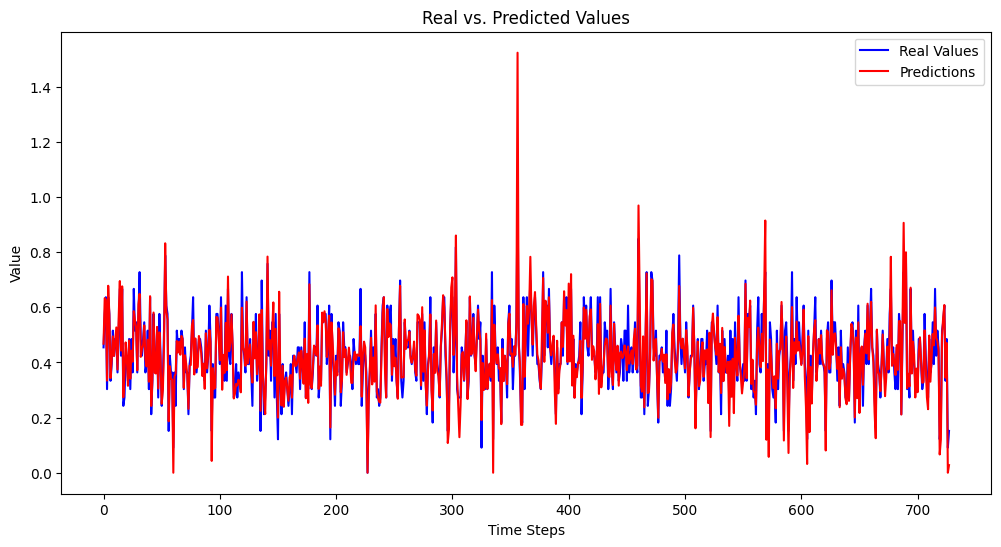

In [17]:
predictions = model.predict(test_X)

# Plot the predictions and real values
plt.figure(figsize=(12, 6))
plt.plot(test_y, label='Real Values', color='blue')
plt.plot(predictions, label='Predictions', color='red')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('Real vs. Predicted Values')
plt.legend()
plt.show()